In [2]:
import pandas as pd
import numpy as np

from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral
from feature_selection import *

In [3]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

In [4]:
final = pd.read_csv('final_dataframe.csv', index_col=False)
final

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.15-30cm.tif,PIRange_Bulkd.30-60cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Bulkd.60-100cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.100-200cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.30-60cm.tif,...,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.30-60cm.tif,Tex_Class.5-15cm.tif,Tex_Class.60-100cm.tif,Valor,PP,valor_humedad_suelo1,slope
0,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,13.532034,0.421875,32.357300
1,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,238.139918,0.438995,32.357300
2,0.595,0.753,0.484,0.621,0.497,0.706,23.513000,32.325001,25.268002,31.559998,...,8.0,8.0,7.0,7.0,7.0,7.0,0,32.059045,0.520004,37.497812
3,0.589,0.682,0.482,0.614,0.498,0.656,25.056000,45.129002,25.813000,32.742996,...,10.0,1.0,9.0,1.0,1.0,1.0,0,0.000000,0.478973,36.717389
4,0.659,0.689,0.573,0.675,0.553,0.660,21.844999,30.417000,18.743000,21.934999,...,8.0,4.0,8.0,8.0,8.0,4.0,0,2.191190,0.438095,60.517945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.604,0.687,0.502,0.631,0.512,0.663,25.153999,44.474998,24.527000,31.266998,...,2.0,2.0,2.0,1.0,1.0,1.0,1,48.621181,0.437820,42.533329
3144,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3145,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3146,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,163.471828,0.438995,42.533329


In [5]:
corr_features = [
    'alpha.0-5cm', 'ksat_0-5cm', 'PIRange_Sand.0-5cm', 'alpha_0-5cm', 
    'ksat_5-15cm', 'PIRange_Sand.15-30cm', 'alpha_5-15cm', 'ksat_15-30cm', 
    'PIRange_Sand.60-100cm', 'alpha_15-30cm', 'ksat_60-100cm', 'PP', 
    'AvMoist.0-5cm', 'ksat_100-200cm', 'PWP.0-5cm', 'AvMoist.5-15cm', 
    'n_0-5cm', 'PWP.100-200cm', 'AvMoist.60-100cm', 'n_5-15cm', 'slope', 
    'Bulkd.0-5cm', 'n_15-30cm', 'Tex_Class.0-5cm', 'Bulkd.5-15cm', 
    'n_60-100cm', 'Tex_Class.5-15cm', 'Bulkd.60-100cm', 'n_100-200cm', 
    'Tex_Class.15-30cm', 'Clay.0-5cm', 'PIRange_Bulkd.0-5cm', 
    'Tex_Class.100-200cm', 'Clay.5-15cm', 'PIRange_Bulkd.5-15cm', 
    'theta_s_0-5cm', 'Clay.15-30cm', 'PIRange_Bulkd.60-100cm', 
    'theta_s_5-15cm', 'FC.0-5cm', 'PIRange_Clay.0-5cm', 'theta_s_15-30cm', 
    'FC.5-15cm', 'PIRange_Clay.5-15cm', 'theta_s_60-100cm', 'FC.60-100cm', 
    'PIRange_Clay.15-30cm', 'VMoist', 'Valor'
]

In [6]:
corr_features[47] = 'valor_humedad_suelo1'

corr_features[47]

'valor_humedad_suelo1'

In [7]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [8]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.90)
#final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 137)


In [9]:
final.columns = final.columns.str.replace('.tif', '')
final = final[corr_features]

- obtener valores de cada generación, al final calcular valor mínimo y valor medio
- guardar todas las poblaciones de cada generación
- guardar los 4 mejores individuos de cada generación
- 


In [ ]:
import os
model_name = 'svm_finetune'
mutFlipBit = 0.8
mut_prob = 0.5
cruce_prob = 0.4
path = f"resultados_ga/ga_{model_name}_mutflip_{str(mutFlipBit).replace('.','_')}_mutprob_{str(mut_prob).replace('.','_')}_cpx_{str(cruce_prob).replace('.','_')}"
os.makedirs(path, exist_ok=True)
target_column = 'Valor'
mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column, n_generations=300, population_size=40,
                                       outputpath = path, mutFlipBit=mutFlipBit, mut_prob=mut_prob, cruce_prob=cruce_prob)
fig = plot_convergence(logbook=logbook)
fig.savefig(f'{path}/convergence_plot.png', 
            dpi=300, 
            bbox_inches='tight')

df = final.drop(columns='Valor')
best_solution = hof[0]
features = df.columns
selected_features = get_selected_features(best_solution, features)

print("Mejores características seleccionadas:", mejores_caracteristicas)
print("Mejor fitness:", hof[0].fitness.values[0])

output_file = f"{path}/resultados.txt"

with open(output_file, 'w') as f:
    f.write('Features seleccionadas\n')
    for feature in selected_features:
        f.write(feature + '\n')
    f.write(f'Mejor Fitness: {hof[0].fitness.values[0]}')

print(f"Resultados guardados en {output_file}")

KeyboardInterrupt: 

In [ ]:
len(mejores_caracteristicas[0])

45

In [ ]:
carac = len(hof[0])
df = final.drop(columns='Valor')

In [ ]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

# Assuming you have the best solution from hof
best_solution = hof[0]  # Get best individual from HallOfFame
#features = ['PIRange_7Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 
#           'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif',
#           'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif',
#           'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif',
#           'valor_humedad_suelo1', 'slope']
features = df.columns
selected_features = get_selected_features(best_solution, features)
print("Selected features:")
for feature in selected_features:
    print(f"- {feature}")

Selected features:
- PIRange_Sand.15-30cm.tif
- ksat_60-100cm.tif
- n_5-15cm.tif
- Bulkd.100-200cm.tif
- Tex_Class.0-5cm.tif
- PP
- valor_humedad_suelo1


In [ ]:
#['PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif', 'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif', 'valor_humedad_suelo1', 'slope']

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

def entrenar_y_evaluar_modelos(df, columna_objetivo):
    # Separar características y variable objetivo
    X = df.drop(columns=[columna_objetivo])
    y = df[columna_objetivo]

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Normalizar los datos
    scaler = StandardScaler()
    X_entrenamiento_normalizado = scaler.fit_transform(X_entrenamiento)
    X_prueba_normalizado = scaler.transform(X_prueba)

    # Guardar valores de normalización
    valores_normalizacion = {'mean': scaler.mean_, 'scale': scaler.scale_}

    # Definir los modelos y sus hiperparámetros para GridSearchCV
    modelos = {
        'Regresión Logística': {
            'modelo': LogisticRegression(),
            'parametros': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
        },
        'Naive Bayes': {
            'modelo': GaussianNB(),
            'parametros': {}
        },
        'SVC': {
            'modelo': SVC(probability=True),
            'parametros': {'C': [0.01, 0.1, 1, 10,100], 'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']}
        },
        'Random Forest': {
            'modelo': RandomForestClassifier(),
            'parametros': {'n_estimators': [100, 200,300], 'max_depth': [None, 10, 20,30]}
        },
        'XGBoost': {
            'modelo': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
            'parametros': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.01, 0.1]}
        },
        'CatBoost': {
            'modelo': CatBoostClassifier(verbose=0),
            'parametros': {'iterations': [100, 200, 300], 'learning_rate': [0.01, 0.01, 0.1]}
        }
    }

    metricas = {}
    calibracion_curvas = {}
    prob_pos_dict = {}

    for nombre, item in modelos.items():
        modelo = item['modelo']
        parametros = item['parametros']

        # Ajustar hiperparámetros si hay parámetros definidos
        if parametros:
            grid = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy', n_jobs=-1)
            grid.fit(X_entrenamiento_normalizado, y_entrenamiento)
            mejor_modelo = grid.best_estimator_
        else:
            modelo.fit(X_entrenamiento_normalizado, y_entrenamiento)
            mejor_modelo = modelo

        # Predecir probabilidades
        if hasattr(mejor_modelo, "predict_proba"):
            prob_pos = mejor_modelo.predict_proba(X_prueba_normalizado)[:, 1]
        else:
            prob_pos = mejor_modelo.decision_function(X_prueba_normalizado)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        # Guardar datos para la curva de calibración
        fraccion_positivos, probabilidad_media = calibration_curve(
            y_prueba, prob_pos, n_bins=10
        )
        calibracion_curvas[nombre] = (probabilidad_media, fraccion_positivos)

        # Guardar probabilidades para histograma
        prob_pos_dict[nombre] = prob_pos

        # Predecir etiquetas
        y_pred = mejor_modelo.predict(X_prueba_normalizado)

        # Calcular métricas
        tn, fp, fn, tp = confusion_matrix(y_prueba, y_pred).ravel()
        sensibilidad = tp / (tp + fn)
        especificidad = tn / (tn + fp)
        precision = accuracy_score(y_prueba, y_pred)

        metricas[nombre] = {
            'Sensibilidad': sensibilidad,
            'Especificidad': especificidad,
            'Precisión': precision,
            'Mejores Hiperparámetros': grid.best_params_ if parametros else 'No aplicable'
        }

    # Graficar todas las curvas de calibración en un solo gráfico
    plt.figure(figsize=(8, 6))
    for nombre, (prob_media, fraccion_pos) in calibracion_curvas.items():
        plt.plot(prob_media, fraccion_pos, marker='o', label=nombre)
    plt.plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
    plt.xlabel('Probabilidad media predicha')
    plt.ylabel('Fracción de positivos')
    plt.title('Curva de Calibración para todos los modelos')
    plt.legend()
    plt.show()

    # Colores para los histogramas
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

    # Graficar histogramas de probabilidades predichas en una cuadrícula de 3x2 con colores diferentes
    fig, axs = plt.subplots(3, 2, figsize=(12, 15))
    axs = axs.ravel()
    for idx, (nombre, probs) in enumerate(prob_pos_dict.items()):
        axs[idx].hist(probs, bins=10, edgecolor='k', color=colors[idx % len(colors)])
        axs[idx].set_title(f'Distribución de Probabilidades - {nombre}')
        axs[idx].set_xlabel('Probabilidad predicha')
        axs[idx].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    return metricas, valores_normalizacion

In [11]:
final.columns =final.columns.str.replace('.tif', '')
final

,alpha.0-5cm,ksat_0-5cm,PIRange_Sand.0-5cm,alpha_0-5cm,ksat_5-15cm,PIRange_Sand.15-30cm,alpha_5-15cm,ksat_15-30cm,PIRange_Sand.60-100cm,alpha_15-30cm,...,FC.0-5cm,PIRange_Clay.0-5cm,theta_s_15-30cm,FC.5-15cm,PIRange_Clay.5-15cm,theta_s_60-100cm,FC.60-100cm,PIRange_Clay.15-30cm,valor_humedad_suelo1,Valor
0,0.427,303.553986,36.184998,0.012,315.993988,30.825001,0.015,267.717987,44.574001,0.011,...,0.370,22.358000,0.631,0.269,29.282999,0.572,0.321,22.490000,0.421875,0
1,0.427,303.553986,36.184998,0.012,315.993988,30.825001,0.015,267.717987,44.574001,0.011,...,0.370,22.358000,0.631,0.269,29.282999,0.572,0.321,22.490000,0.438995,0
2,0.293,371.622986,36.636002,0.006,211.750000,31.510998,0.009,291.281006,46.751999,0.008,...,0.411,23.513000,0.623,0.409,24.007999,0.553,0.383,25.268002,0.520004,0
3,0.129,166.621002,34.499001,0.005,78.719002,31.039001,0.009,174.261002,37.791000,0.006,...,0.473,25.056000,0.613,0.457,26.689999,0.591,0.454,25.813000,0.478973,0
4,0.429,275.221985,36.883003,0.013,239.182999,31.253002,0.017,309.858002,42.887001,0.013,...,0.289,21.844999,0.523,0.274,21.226999,0.553,0.283,18.743000,0.438095,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.149,78.428001,36.001999,0.006,66.454002,30.672001,0.006,82.512001,43.591999,0.006,...,0.426,25.153999,0.551,0.418,27.872997,0.605,0.464,24.527000,0.437820,1
3144,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.436722,1
3145,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.436722,1
3146,0.167,266.264008,36.520000,0.004,90.331001,31.712999,0.005,236.319000,46.224998,0.006,...,0.476,25.213001,0.618,0.420,26.219002,0.578,0.440,24.993999,0.438995,1


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [16:46:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


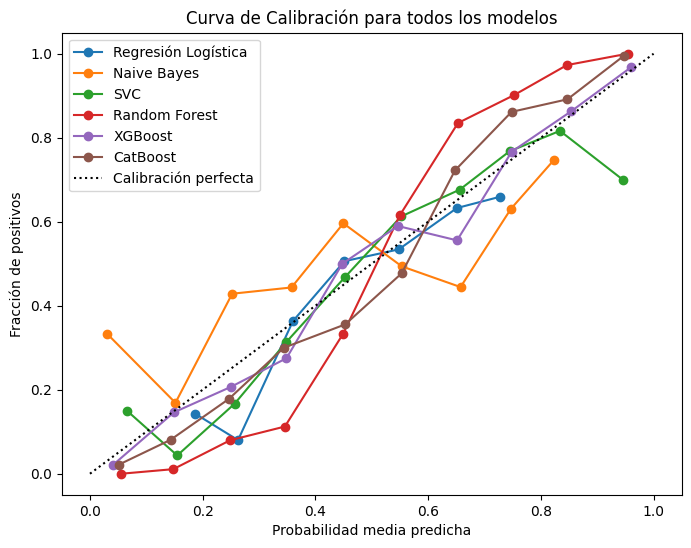

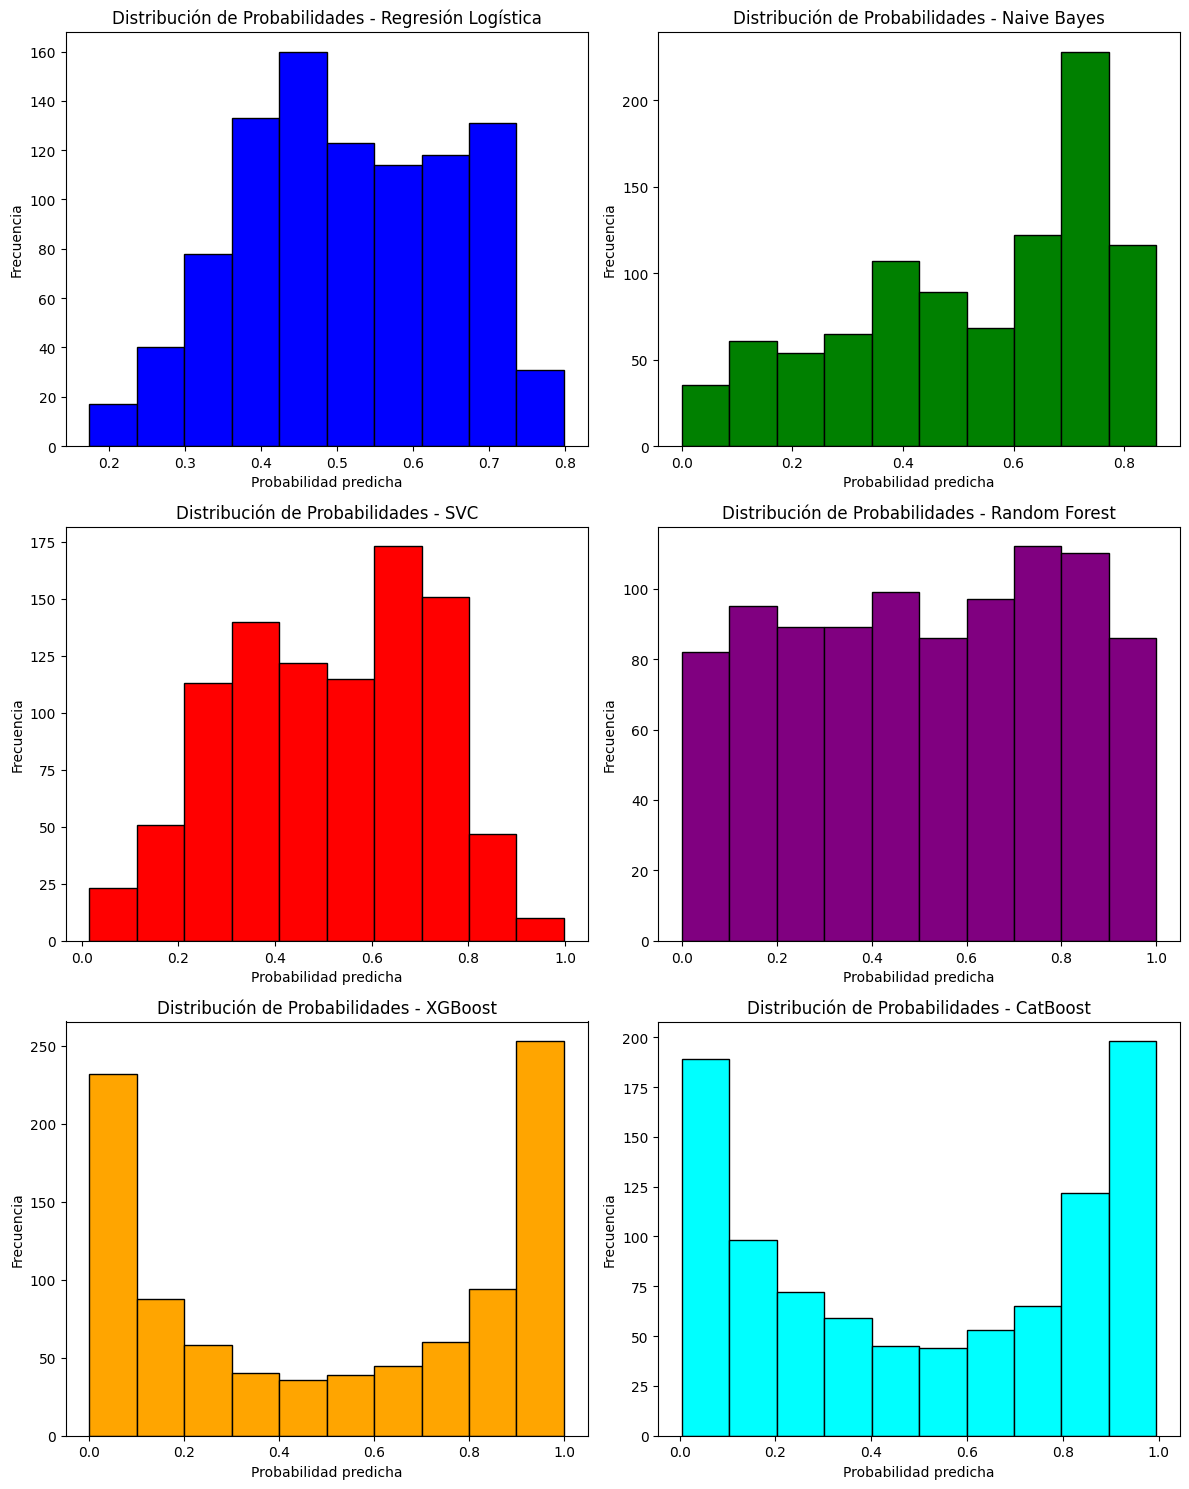

In [12]:
columns = ['ksat_0-5cm',
'PP',
'PWP.100-200cm',
'slope',
'Bulkd.5-15cm',
'valor_humedad_suelo1',
'Valor']
df_final = final[columns]
target = 'Valor'
metricas, valores_normalizacion = entrenar_y_evaluar_modelos(df_final, target)

In [13]:
metricas

{'Regresión Logística': {'Sensibilidad': 0.6096033402922756,
  'Especificidad': 0.5858369098712446,
  'Precisión': 0.5978835978835979,
  'Mejores Hiperparámetros': {'C': 0.1, 'solver': 'liblinear'}},
 'Naive Bayes': {'Sensibilidad': 0.6534446764091858,
  'Especificidad': 0.4978540772532189,
  'Precisión': 0.5767195767195767,
  'Mejores Hiperparámetros': 'No aplicable'},
 'SVC': {'Sensibilidad': 0.7286012526096033,
  'Especificidad': 0.6866952789699571,
  'Precisión': 0.707936507936508,
  'Mejores Hiperparámetros': {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}},
 'Random Forest': {'Sensibilidad': 0.8935281837160751,
  'Especificidad': 0.8648068669527897,
  'Precisión': 0.8793650793650793,
  'Mejores Hiperparámetros': {'max_depth': 20, 'n_estimators': 300}},
 'XGBoost': {'Sensibilidad': 0.8768267223382046,
  'Especificidad': 0.8476394849785408,
  'Precisión': 0.8624338624338624,
  'Mejores Hiperparámetros': {'learning_rate': 0.1, 'n_estimators': 300}},
 'CatBoost': {'Sensibilidad': 0.8768

In [16]:
import pandas as pd
df = pd.read_csv('resultados_ga\ga_svm_mutflip_0_5_mutprob_0_3_cpx_0_3\ga_svm_mutflip_0_5_mutprob_0_3_cpx_0_3.csv')
df

,alpha.0-5cm,ksat_0-5cm,PIRange_Sand.0-5cm,alpha_0-5cm,ksat_5-15cm,PIRange_Sand.15-30cm,alpha_5-15cm,ksat_15-30cm,PIRange_Sand.60-100cm,alpha_15-30cm,...,theta_s_5-15cm,FC.0-5cm,PIRange_Clay.0-5cm,theta_s_15-30cm,FC.5-15cm,PIRange_Clay.5-15cm,theta_s_60-100cm,FC.60-100cm,PIRange_Clay.15-30cm,valor_humedad_suelo1
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,1
1,1,0,1,0,0,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
2,0,1,1,0,1,1,0,1,0,1,...,0,1,1,1,0,1,1,1,1,0
3,1,1,1,0,0,1,0,0,0,0,...,0,0,1,1,1,1,0,1,1,0
4,1,1,0,0,1,1,1,0,0,1,...,1,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,1,0,0,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
11996,0,0,1,0,0,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
11997,0,0,1,0,0,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
11998,0,0,1,0,0,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1


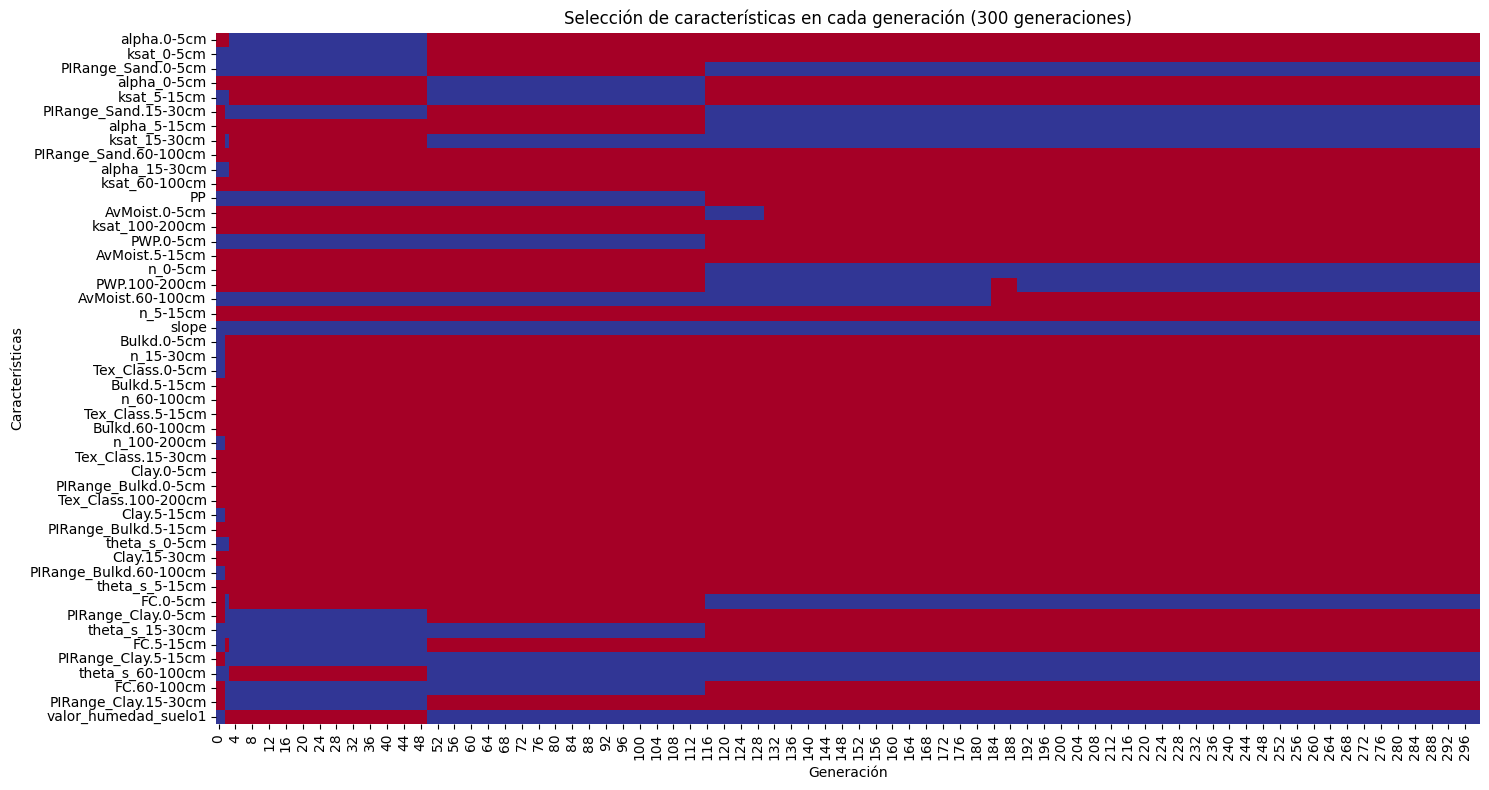


Resumen estadístico de la selección de características:
                        Frecuancia de selección  Primera Generación  \
alpha.0-5cm                               0.157                   0   
ksat_0-5cm                                0.167                   1   
PIRange_Sand.0-5cm                        0.780                   1   
alpha_0-5cm                               0.220                   0   
ksat_5-15cm                               0.230                   1   
PIRange_Sand.15-30cm                      0.773                   0   
alpha_5-15cm                              0.613                   0   
ksat_15-30cm                              0.837                   0   
PIRange_Sand.60-100cm                     0.000                   0   
alpha_15-30cm                             0.010                   1   
ksat_60-100cm                             0.000                   0   
PP                                        0.387                   1   
AvMoist.0-5cm       

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get best individual from each generation (first row of each 40)
best_individuals = df.iloc[::40].reset_index(drop=True)

# Create figure
plt.figure(figsize=(15, 8))

# Create heatmap
sns.heatmap(best_individuals.T, 
            cmap='RdYlBu',
            cbar_kws={'label': 'Seleccionada (1) / No seleccionada (0)'},
            cbar=False,
            yticklabels=best_individuals.columns,)


# Set titles and labels
plt.title('Selección de características en cada generación (300 generaciones)')
plt.xlabel('Generación')
plt.ylabel('Características')

plt.tight_layout()
plt.show()

print("\nResumen estadístico de la selección de características:")
summary = pd.DataFrame({
    'Frecuancia de selección': best_individuals.mean(),
    'Primera Generación': best_individuals.iloc[0],
    'Última Generación': best_individuals.iloc[-1]
}).round(3)
print(summary)

In [31]:
X.shape

(3148, 6)

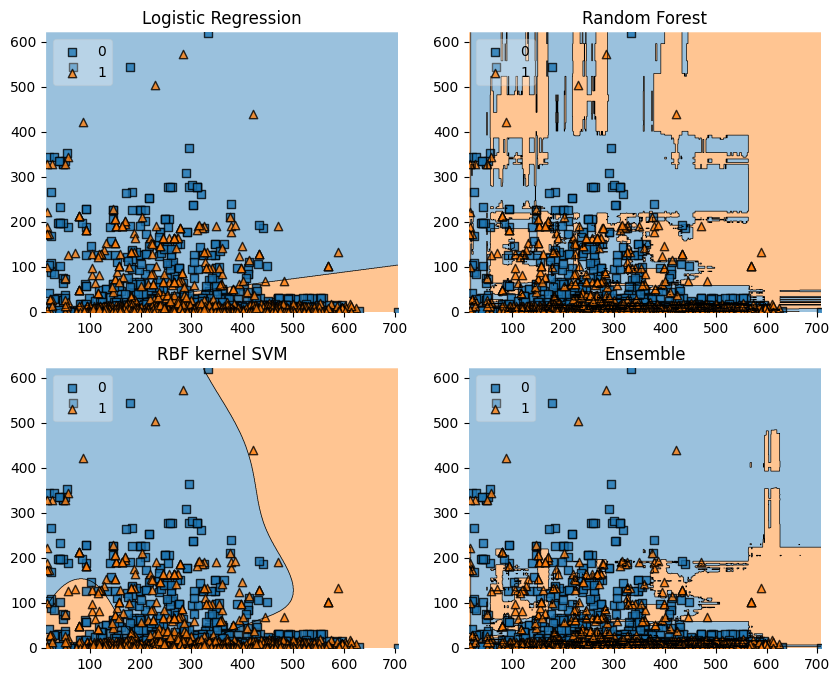

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X = final[columns].drop(columns='Valor').values
y = final['Valor'].values

# Plotting Decision Regions
X = X[:, [0, 1]]
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()